<a href="https://colab.research.google.com/github/imraunav/Computer-vision-EE511/blob/main/cv-ResNet152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import random_split
from tqdm import tqdm

In [25]:
# Download training data from open datasets.
train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform= transforms.Compose([
    transforms.Resize(64),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
]),
)

# Download test data from open datasets.
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
]),
)

Files already downloaded and verified
Files already downloaded and verified


In [26]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_dataloader=DataLoader(test_data,batch_size=batch_size*2, num_workers=2, pin_memory=True)

for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 3, 64, 64])
Shape of y: torch.Size([64]) torch.int64


In [27]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [28]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', weights='ResNet152_Weights.IMAGENET1K_V2')

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [29]:
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [30]:
# for param in model.parameters():
#     param.requires_grad = False

In [31]:
model.fc = nn.Linear(2048, 10)

In [32]:
for param in model.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [33]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    batch_losses = []
    for batch in tqdm(dataloader):
        X, y = batch
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = nn.functional.log_softmax(model(X), dim=-1)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())

    return sum(batch_losses)/len(batch_losses)

In [34]:
model.to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [35]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [36]:
max_epoch = 25

train_loss = []
for epoch in range(max_epoch):
  print(f"Epoch {epoch+1}")
  epoch_loss = train(train_dataloader,model,loss_fn,optimizer)
  print(f"Train loss: {epoch_loss}")
  train_loss.append(epoch_loss)

Epoch 1


100%|██████████| 782/782 [02:46<00:00,  4.71it/s]


Train loss: 0.5621396268496428
Epoch 2


100%|██████████| 782/782 [02:46<00:00,  4.69it/s]


Train loss: 0.34490326505221064
Epoch 3


100%|██████████| 782/782 [02:45<00:00,  4.71it/s]


Train loss: 0.2912037690143908
Epoch 4


100%|██████████| 782/782 [02:45<00:00,  4.72it/s]


Train loss: 0.24431491806588668
Epoch 5


100%|██████████| 782/782 [02:44<00:00,  4.74it/s]


Train loss: 0.20192889330427513
Epoch 6


100%|██████████| 782/782 [02:45<00:00,  4.72it/s]


Train loss: 0.16872667592457113
Epoch 7


100%|██████████| 782/782 [02:44<00:00,  4.75it/s]


Train loss: 0.1490238516953538
Epoch 8


100%|██████████| 782/782 [02:44<00:00,  4.75it/s]


Train loss: 0.14815737974122548
Epoch 9


100%|██████████| 782/782 [02:43<00:00,  4.77it/s]


Train loss: 0.11182839971135759
Epoch 10


100%|██████████| 782/782 [02:43<00:00,  4.77it/s]


Train loss: 0.10587598547182234
Epoch 11


100%|██████████| 782/782 [02:44<00:00,  4.75it/s]


Train loss: 0.08998244413879732
Epoch 12


100%|██████████| 782/782 [02:45<00:00,  4.73it/s]


Train loss: 0.08985082655513893
Epoch 13


100%|██████████| 782/782 [02:45<00:00,  4.73it/s]


Train loss: 0.0803856788562787
Epoch 14


100%|██████████| 782/782 [02:44<00:00,  4.77it/s]


Train loss: 0.07079086069802484
Epoch 15


100%|██████████| 782/782 [02:44<00:00,  4.76it/s]


Train loss: 0.07213165717440016
Epoch 16


100%|██████████| 782/782 [02:44<00:00,  4.76it/s]


Train loss: 0.06561799932037816
Epoch 17


100%|██████████| 782/782 [02:45<00:00,  4.72it/s]


Train loss: 0.07081187639818372
Epoch 18


100%|██████████| 782/782 [02:45<00:00,  4.74it/s]


Train loss: 0.05673559415681154
Epoch 19


100%|██████████| 782/782 [02:45<00:00,  4.73it/s]


Train loss: 0.052423903398299734
Epoch 20


100%|██████████| 782/782 [02:45<00:00,  4.74it/s]


Train loss: 0.05382443935742252
Epoch 21


100%|██████████| 782/782 [02:45<00:00,  4.73it/s]


Train loss: 0.048973519768169306
Epoch 22


100%|██████████| 782/782 [02:44<00:00,  4.76it/s]


Train loss: 0.05048901636438245
Epoch 23


100%|██████████| 782/782 [02:43<00:00,  4.78it/s]


Train loss: 0.04227913810704511
Epoch 24


100%|██████████| 782/782 [02:45<00:00,  4.73it/s]


Train loss: 0.04518555007591036
Epoch 25


100%|██████████| 782/782 [02:44<00:00,  4.75it/s]

Train loss: 0.04461407488928941


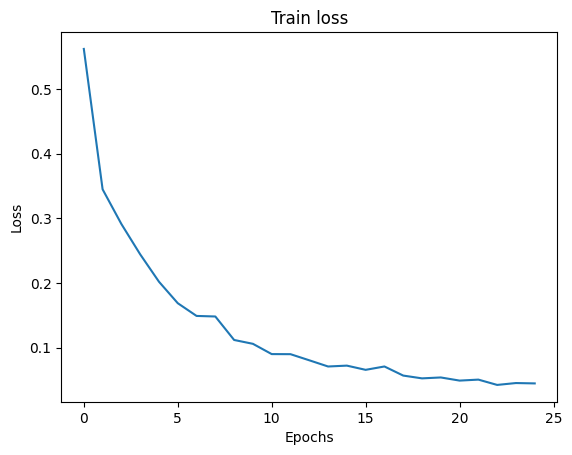

In [37]:
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.title("Train loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [38]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [39]:
test(test_dataloader,model,loss_fn)

Test Error: 
 Accuracy: 90.3%, Avg loss: 0.389056 

